In [1]:
import pandas as pd
import seaborn as sns
sns.set()

import datetime
import os

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

logs_base_dir = "./logs"
logdir = os.path.join(logs_base_dir, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

chk_base_dir = "./checkpoints"

In [2]:
%load_ext tensorboard.notebook
%tensorboard --logdir {logs_base_dir}
%matplotlib inline

# EDA

In [3]:
train_data = pd.read_csv('train_data.csv')
train_data.head()

,frame_size,frame_type,label_current_charge,label_energy_fraction,label_flow_count,label_initial_charge,size_1hop,size_2hop,size_3hop,sum_1hop_current_charge,...,sum_1hop_flow_counter,sum_1hop_initial_charge,sum_2hop_current_charge,sum_2hop_energy_fraction,sum_2hop_flow_counter,sum_2hop_initial_charge,sum_3hop_current_charge,sum_3hop_energy_fraction,sum_3hop_flow_counter,sum_3hop_initial_charge
0,534.0,I,0.500000,0.500000,0.500000,0.500000,2.0,3.0,4.0,200.0,...,0.0,200.0,300.0,3.0,0.0,300.0,400.0,4.0,0.0,400.0
1,534.0,I,0.666667,0.666667,0.666667,0.666667,3.0,4.0,5.0,300.0,...,0.0,300.0,400.0,4.0,0.0,400.0,500.0,5.0,0.0,500.0
2,534.0,I,0.666667,0.666667,0.666667,0.666667,3.0,5.0,6.0,300.0,...,0.0,300.0,500.0,5.0,0.0,500.0,600.0,6.0,0.0,600.0
3,534.0,I,0.000000,0.000000,0.000000,0.000000,3.0,5.0,7.0,300.0,...,0.0,300.0,500.0,5.0,0.0,500.0,700.0,7.0,0.0,700.0
4,534.0,I,0.333333,0.333333,0.333333,0.333333,3.0,5.0,6.0,300.0,...,0.0,300.0,500.0,5.0,0.0,500.0,600.0,6.0,0.0,600.0


In [4]:
train_data.describe()

,frame_size,label_current_charge,label_energy_fraction,label_flow_count,label_initial_charge,size_1hop,size_2hop,size_3hop,sum_1hop_current_charge,sum_1hop_energy_fraction,sum_1hop_flow_counter,sum_1hop_initial_charge,sum_2hop_current_charge,sum_2hop_energy_fraction,sum_2hop_flow_counter,sum_2hop_initial_charge,sum_3hop_current_charge,sum_3hop_energy_fraction,sum_3hop_flow_counter,sum_3hop_initial_charge
count,232028.000000,232028.000000,232028.000000,232028.000000,232028.000000,232028.000000,232028.000000,232028.000000,232028.000000,232028.000000,232028.000000,232028.000000,232028.000000,232028.000000,232028.000000,232028.000000,232028.000000,232028.000000,232028.000000,232028.000000
mean,3242.410287,0.322316,0.365025,0.342098,0.409756,3.459656,5.787099,7.080913,238.451401,2.384514,1242.376765,345.965573,401.758627,4.017586,1846.454880,578.709897,493.213167,4.932132,2186.060924,708.091265
std,2308.661053,0.261609,0.262120,0.262144,0.277355,0.623100,1.547656,2.043541,84.890789,0.848908,910.456039,62.310006,161.979522,1.619795,1407.325823,154.765567,204.363546,2.043635,1727.817889,204.354133
min,72.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,4.000000,53.054912,0.530549,0.000000,200.000000,77.653072,0.776531,0.000000,300.000000,85.130272,0.851303,0.000000,400.000000
25%,1405.000000,0.000000,0.250000,0.000000,0.250000,3.000000,5.000000,6.000000,173.731856,1.737319,514.000000,300.000000,277.339480,2.773395,757.000000,500.000000,339.690635,3.396906,891.000000,600.000000
50%,2746.000000,0.333333,0.333333,0.333333,0.500000,4.000000,6.000000,6.000000,232.636798,2.326368,1078.000000,400.000000,384.465644,3.844656,1553.000000,600.000000,463.263576,4.632636,1791.000000,600.000000
75%,4886.000000,0.500000,0.666667,0.500000,0.666667,4.000000,7.000000,8.000000,297.617296,2.976173,1768.000000,400.000000,499.204470,4.992045,2600.000000,700.000000,599.137162,5.991372,3033.000000,800.000000
max,13169.000000,0.750000,0.750000,0.750000,0.750000,4.000000,8.000000,12.000000,400.000000,4.000000,4882.000000,400.000000,799.980776,7.999808,8139.000000,800.000000,1199.858592,11.998586,10936.000000,1200.000000


In [5]:
train_data.isnull().sum()

frame_size                  0
frame_type                  0
label_current_charge        0
label_energy_fraction       0
label_flow_count            0
label_initial_charge        0
size_1hop                   0
size_2hop                   0
size_3hop                   0
sum_1hop_current_charge     0
sum_1hop_energy_fraction    0
sum_1hop_flow_counter       0
sum_1hop_initial_charge     0
sum_2hop_current_charge     0
sum_2hop_energy_fraction    0
sum_2hop_flow_counter       0
sum_2hop_initial_charge     0
sum_3hop_current_charge     0
sum_3hop_energy_fraction    0
sum_3hop_flow_counter       0
sum_3hop_initial_charge     0
dtype: int64

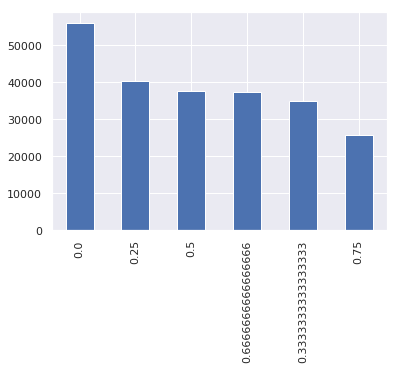

In [6]:
train_data['label_energy_fraction'].value_counts().plot.bar()

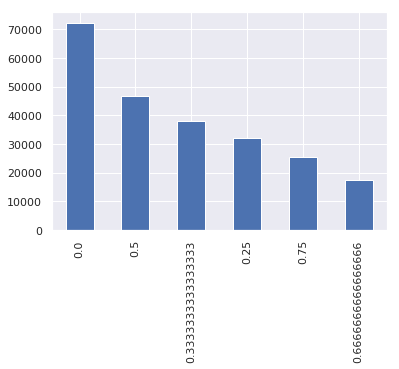

In [7]:
train_data['label_current_charge'].value_counts().plot.bar()

In [8]:
val_data = pd.read_csv('val_data.csv')
val_data.head()

,frame_size,frame_type,label_current_charge,label_energy_fraction,label_flow_count,label_initial_charge,size_1hop,size_2hop,size_3hop,sum_1hop_current_charge,...,sum_1hop_flow_counter,sum_1hop_initial_charge,sum_2hop_current_charge,sum_2hop_energy_fraction,sum_2hop_flow_counter,sum_2hop_initial_charge,sum_3hop_current_charge,sum_3hop_energy_fraction,sum_3hop_flow_counter,sum_3hop_initial_charge
0,600.0,I,0.750000,0.750000,0.750000,0.750000,4.0,11.0,29.0,600.0,...,0.0,600.0,1650.0,11.0,0.0,1650.0,4350.0,29.0,0.0,4350.0
1,600.0,I,0.750000,0.750000,0.750000,0.750000,4.0,12.0,31.0,600.0,...,0.0,600.0,1800.0,12.0,0.0,1800.0,4650.0,31.0,0.0,4650.0
2,600.0,I,0.750000,0.750000,0.750000,0.750000,4.0,10.0,29.0,600.0,...,0.0,600.0,1500.0,10.0,0.0,1500.0,4350.0,29.0,0.0,4350.0
3,600.0,I,0.333333,0.333333,0.333333,0.333333,3.0,9.0,21.0,450.0,...,0.0,450.0,1350.0,9.0,0.0,1350.0,3150.0,21.0,0.0,3150.0
4,600.0,I,0.500000,0.500000,0.500000,0.500000,4.0,9.0,26.0,600.0,...,0.0,600.0,1350.0,9.0,0.0,1350.0,3900.0,26.0,0.0,3900.0


In [9]:
val_data.describe()

,frame_size,label_current_charge,label_energy_fraction,label_flow_count,label_initial_charge,size_1hop,size_2hop,size_3hop,sum_1hop_current_charge,sum_1hop_energy_fraction,sum_1hop_flow_counter,sum_1hop_initial_charge,sum_2hop_current_charge,sum_2hop_energy_fraction,sum_2hop_flow_counter,sum_2hop_initial_charge,sum_3hop_current_charge,sum_3hop_energy_fraction,sum_3hop_flow_counter,sum_3hop_initial_charge
count,66503.000000,66503.000000,66503.000000,66503.000000,66503.000000,66503.000000,66503.000000,66503.000000,66503.000000,66503.000000,66503.000000,66503.000000,66503.000000,66503.000000,66503.000000,66503.000000,66503.000000,66503.000000,66503.000000,66503.000000
mean,2352.857300,0.399611,0.314622,0.456363,0.370483,3.604258,9.052223,22.659429,365.135957,2.434240,643.329790,540.638768,922.932048,6.152880,878.618423,1357.833481,2319.868500,15.465790,1352.229914,3398.914335
std,1435.839648,0.297595,0.288641,0.286660,0.276135,0.554602,1.790162,4.714443,129.206538,0.861377,817.737586,83.190227,343.057213,2.287048,873.045591,268.524300,866.962741,5.779752,1118.258722,707.166393
min,134.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,8.000000,38.257296,0.255049,0.000000,300.000000,89.765040,0.598434,0.000000,450.000000,306.064496,2.040430,0.000000,1200.000000
25%,1493.000000,0.000000,0.000000,0.250000,0.000000,3.000000,8.000000,20.000000,261.696899,1.744646,73.000000,450.000000,652.727975,4.351520,198.000000,1200.000000,1636.390112,10.909267,488.500000,3000.000000
50%,2109.000000,0.500000,0.250000,0.500000,0.333333,4.000000,9.000000,23.000000,369.517606,2.463451,258.000000,600.000000,913.036313,6.086909,540.000000,1350.000000,2280.772190,15.205148,1070.000000,3450.000000
75%,2828.000000,0.750000,0.666667,0.750000,0.666667,4.000000,10.000000,26.000000,460.781840,3.071879,934.000000,600.000000,1174.264846,7.828432,1380.000000,1500.000000,2940.130367,19.600869,1985.000000,3900.000000
max,9865.000000,0.750000,0.750000,0.750000,0.750000,4.000000,12.000000,35.000000,600.000000,4.000000,4269.000000,600.000000,1800.000000,12.000000,4868.000000,1800.000000,5245.467248,34.969782,8628.000000,5250.000000


In [10]:
val_data.isnull().sum()

frame_size                  0
frame_type                  0
label_current_charge        0
label_energy_fraction       0
label_flow_count            0
label_initial_charge        0
size_1hop                   0
size_2hop                   0
size_3hop                   0
sum_1hop_current_charge     0
sum_1hop_energy_fraction    0
sum_1hop_flow_counter       0
sum_1hop_initial_charge     0
sum_2hop_current_charge     0
sum_2hop_energy_fraction    0
sum_2hop_flow_counter       0
sum_2hop_initial_charge     0
sum_3hop_current_charge     0
sum_3hop_energy_fraction    0
sum_3hop_flow_counter       0
sum_3hop_initial_charge     0
dtype: int64

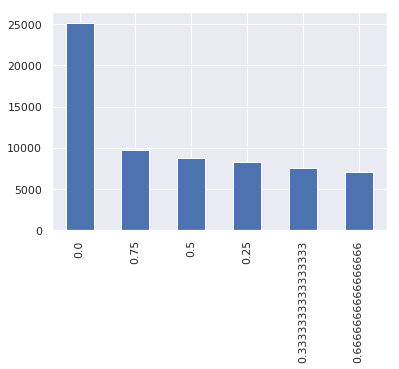

In [11]:
val_data['label_energy_fraction'].value_counts().plot.bar()

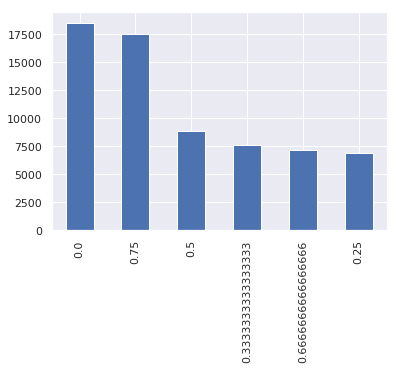

In [12]:
val_data['label_current_charge'].value_counts().plot.bar()

## Data massaging

In [13]:
def handle_missing_data(_df):
    df=_df
    df.dropna(inplace=True)
    return df

def feature_eng(_df):
    df=_df
    df['avg_CC_1hop'] = df['sum_1hop_current_charge']/df['size_1hop']
    df['avg_CC_2hop'] = df['sum_2hop_current_charge']/df['size_2hop']
    df['avg_CC_3hop'] = df['sum_3hop_current_charge']/df['size_3hop']
    df['avg_EF_1hop'] = df['sum_1hop_energy_fraction']/df['size_1hop']
    df['avg_EF_2hop'] = df['sum_2hop_energy_fraction']/df['size_2hop']
    df['avg_EF_3hop'] = df['sum_3hop_energy_fraction']/df['size_3hop']
    df = df.drop([
        'sum_1hop_current_charge', 
        'sum_2hop_current_charge', 
        'sum_3hop_current_charge',
        'sum_1hop_energy_fraction',
        'sum_2hop_energy_fraction',
        'sum_3hop_energy_fraction',
        'sum_1hop_flow_counter',
        'sum_2hop_flow_counter',
        'sum_3hop_flow_counter',
        'sum_1hop_initial_charge',
        'sum_2hop_initial_charge',
        'sum_3hop_initial_charge'
    ], axis='columns')
    return df

In [14]:
X_train = train_data
X_val = val_data

X_train = feature_eng(X_train)
X_val = feature_eng(X_val)

In [15]:
y_train = to_categorical(X_train['label_energy_fraction'].values)
X_train = X_train.drop(['label_current_charge', 'label_energy_fraction', 'label_flow_count', 'label_initial_charge'], axis='columns')

y_val = to_categorical(X_val['label_energy_fraction'].values)
X_val = X_val.drop(['label_current_charge', 'label_energy_fraction', 'label_flow_count', 'label_initial_charge'], axis='columns')

le = LabelEncoder()
X_train['frame_type'] = le.fit_transform(X_train['frame_type'])
X_val['frame_type'] = le.fit_transform(X_val['frame_type'])

In [16]:
X_train.head(15)

,frame_size,frame_type,size_1hop,size_2hop,size_3hop,avg_CC_1hop,avg_CC_2hop,avg_CC_3hop,avg_EF_1hop,avg_EF_2hop,avg_EF_3hop
0,534.0,1,2.0,3.0,4.0,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000
1,534.0,1,3.0,4.0,5.0,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000
2,534.0,1,3.0,5.0,6.0,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000
3,534.0,1,3.0,5.0,7.0,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000
4,534.0,1,3.0,5.0,6.0,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000
5,534.0,1,3.0,4.0,5.0,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000
6,534.0,1,2.0,3.0,4.0,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000
7,534.0,1,3.0,4.0,5.0,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000
8,534.0,1,3.0,5.0,6.0,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000
9,534.0,1,3.0,5.0,7.0,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000


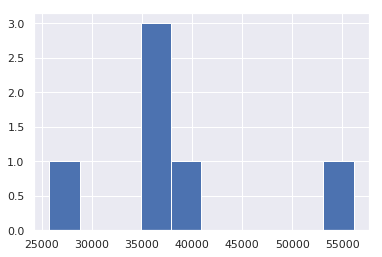

In [17]:
train_data['label_energy_fraction'].value_counts().hist()

In [18]:
(X_train.shape, y_train.shape), (X_val.shape, y_val.shape)

(((232028, 11), (232028, 1)), ((66503, 11), (66503, 1)))

# Define NN model

In [55]:
BATCH_SIZE = 32
EPOCHS = 100

# Returns a short sequential model
def create_model(sample_input): # numpy array so we can use .shape
    model = tf.keras.Sequential([
        layers.Dense(64, activation='softmax', input_shape=sample_input.shape),
        layers.Dense(64, activation='softmax'),
        layers.Dense(6, activation='softmax')
    ])

    # from my initial tests
    model.compile(optimizer=tf.train.RMSPropOptimizer(0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    # from another tf.keras tutorial
#     model.compile(optimizer=tf.keras.optimizers.Adam(),
#                 loss=tf.keras.losses.sparse_categorical_crossentropy,
#                 metrics=['accuracy'])

    return model

## 3 HOPS Neighborhood

In [44]:
tf.keras.backend.clear_session()
tensorboard_callback = tf.keras.callbacks.TensorBoard(os.path.join(logdir,'3hops'), histogram_freq=1)
chk_callback = tf.keras.callbacks.ModelCheckpoint(os.path.join(chk_base_dir,'3hops'), 
                                                 save_weights_only=True,
                                                 verbose=1)

In [45]:
model = create_model(X_train.values[0])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
Total params: 5,318
Trainable params: 5,318
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(
    x=X_train.values,
    y=y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val.values, y_val),
    callbacks = [tensorboard_callback, chk_callback]
)

Train on 232028 samples, validate on 66503 samples
Epoch 1/100
231936/232028 [============================>.] - ETA: 0s - loss: 0.0334 - acc: 1.0000
Epoch 00001: saving model to ./checkpoints/3hops
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.
232028/232028 [==============================] - 9s 41us/sample - loss: 0.0334 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 2/100
231840/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00002: saving model to ./checkpoints/3hops
232028/232028 [==============================] - 9s 38us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 3/100
231968/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00003: saving model to ./checkpoints/3hops
232028/232028 [==============================] - 9s 37us/sample - loss: 5.9605e-07 - acc: 1.0000 

Epoch 28/100
231040/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00028: saving model to ./checkpoints/3hops
232028/232028 [==============================] - 8s 34us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 29/100
230048/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00029: saving model to ./checkpoints/3hops
232028/232028 [==============================] - 8s 36us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 30/100
231712/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00030: saving model to ./checkpoints/3hops
232028/232028 [==============================] - 8s 35us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 31/100
231776/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00031: saving model t

231712/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00056: saving model to ./checkpoints/3hops
232028/232028 [==============================] - 9s 37us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 57/100
231904/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00057: saving model to ./checkpoints/3hops
232028/232028 [==============================] - 9s 37us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 58/100
231360/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00058: saving model to ./checkpoints/3hops
232028/232028 [==============================] - 8s 36us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 59/100
230720/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00059: saving model to ./checkpoin

230176/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00084: saving model to ./checkpoints/3hops
232028/232028 [==============================] - 9s 37us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 85/100
230688/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00085: saving model to ./checkpoints/3hops
232028/232028 [==============================] - 8s 35us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 86/100
231712/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00086: saving model to ./checkpoints/3hops
232028/232028 [==============================] - 8s 36us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 87/100
231936/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00087: saving model to ./checkpoin

## 2 HOPS Neighborhood

In [47]:
tf.keras.backend.clear_session()
tensorboard_callback = tf.keras.callbacks.TensorBoard(os.path.join(logdir,'2hops'), histogram_freq=1)
chk_callback = tf.keras.callbacks.ModelCheckpoint(os.path.join(chk_base_dir,'2hops'), 
                                                 save_weights_only=True,
                                                 verbose=1)

In [48]:
X_train = X_train.drop(['size_3hop', 'avg_CC_3hop', 'avg_EF_3hop'], axis='columns')
X_val = X_val.drop(['size_3hop', 'avg_CC_3hop', 'avg_EF_3hop'], axis='columns')

In [49]:
model = create_model(X_train.values[0])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
Total params: 5,126
Trainable params: 5,126
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit(
    x=X_train.values,
    y=y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val.values, y_val),
    callbacks = [tensorboard_callback, chk_callback]
)

Train on 232028 samples, validate on 66503 samples
Epoch 1/100
230688/232028 [============================>.] - ETA: 0s - loss: 0.0340 - acc: 0.9989
Epoch 00001: saving model to ./checkpoints/2hops
232028/232028 [==============================] - 9s 38us/sample - loss: 0.0338 - acc: 0.9989 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 2/100
230400/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00002: saving model to ./checkpoints/2hops
232028/232028 [==============================] - 9s 38us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 3/100
231328/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00003: saving model to ./checkpoints/2hops
232028/232028 [==============================] - 9s 37us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 4/100
231616/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - 

231712/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00029: saving model to ./checkpoints/2hops
232028/232028 [==============================] - 8s 34us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 30/100
231040/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00030: saving model to ./checkpoints/2hops
232028/232028 [==============================] - 8s 36us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 31/100
230464/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00031: saving model to ./checkpoints/2hops
232028/232028 [==============================] - 8s 36us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 32/100
230560/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00032: saving model to ./checkpoin

231584/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00057: saving model to ./checkpoints/2hops
232028/232028 [==============================] - 8s 35us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 58/100
231168/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00058: saving model to ./checkpoints/2hops
232028/232028 [==============================] - 9s 38us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 59/100
231040/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00059: saving model to ./checkpoints/2hops
232028/232028 [==============================] - 9s 37us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 60/100
230944/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00060: saving model to ./checkpoin

231968/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00085: saving model to ./checkpoints/2hops
232028/232028 [==============================] - 8s 36us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 86/100
231008/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00086: saving model to ./checkpoints/2hops
232028/232028 [==============================] - 9s 38us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 87/100
231744/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00087: saving model to ./checkpoints/2hops
232028/232028 [==============================] - 8s 36us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 88/100
230304/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00088: saving model to ./checkpoin

## 1 HOP Neighborhood

In [51]:
tf.keras.backend.clear_session()
tensorboard_callback = tf.keras.callbacks.TensorBoard(os.path.join(logdir,'1hop'), histogram_freq=1)
chk_callback = tf.keras.callbacks.ModelCheckpoint(os.path.join(chk_base_dir,'1hop'), 
                                                 save_weights_only=True,
                                                 verbose=1)

In [52]:
X_train = X_train.drop(['size_2hop', 'avg_CC_2hop', 'avg_EF_2hop'], axis='columns')
X_val = X_val.drop(['size_2hop', 'avg_CC_2hop', 'avg_EF_2hop'], axis='columns')

In [53]:
model = create_model(X_train.values[0])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
Total params: 4,934
Trainable params: 4,934
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.fit(
    x=X_train.values,
    y=y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val.values, y_val),
    callbacks = [tensorboard_callback, chk_callback]
)

Train on 232028 samples, validate on 66503 samples
Epoch 1/100
231648/232028 [============================>.] - ETA: 0s - loss: 0.0336 - acc: 0.9990
Epoch 00001: saving model to ./checkpoints/1hop
232028/232028 [==============================] - 9s 38us/sample - loss: 0.0335 - acc: 0.9990 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 2/100
230624/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00002: saving model to ./checkpoints/1hop
232028/232028 [==============================] - 9s 38us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 3/100
230976/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00003: saving model to ./checkpoints/1hop
232028/232028 [==============================] - 9s 37us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 4/100
230560/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc

231936/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00029: saving model to ./checkpoints/1hop
232028/232028 [==============================] - 8s 36us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 30/100
231040/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00030: saving model to ./checkpoints/1hop
232028/232028 [==============================] - 9s 37us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 31/100
231808/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00031: saving model to ./checkpoints/1hop
232028/232028 [==============================] - 9s 37us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 32/100
230560/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00032: saving model to ./checkpoints/

Epoch 58/100
231616/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00058: saving model to ./checkpoints/1hop
232028/232028 [==============================] - 9s 37us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 59/100
230144/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00059: saving model to ./checkpoints/1hop
232028/232028 [==============================] - 8s 36us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 60/100
231072/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00060: saving model to ./checkpoints/1hop
232028/232028 [==============================] - 9s 39us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 61/100
230592/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00061: saving model to .

232000/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00086: saving model to ./checkpoints/1hop
232028/232028 [==============================] - 9s 37us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 87/100
231744/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00087: saving model to ./checkpoints/1hop
232028/232028 [==============================] - 9s 40us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 88/100
231232/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00088: saving model to ./checkpoints/1hop
232028/232028 [==============================] - 9s 38us/sample - loss: 5.9605e-07 - acc: 1.0000 - val_loss: 5.9605e-07 - val_acc: 1.0000
Epoch 89/100
231456/232028 [============================>.] - ETA: 0s - loss: 5.9605e-07 - acc: 1.0000
Epoch 00089: saving model to ./checkpoints/